In [25]:
from datascience import *
import matplotlib
matplotlib.use('Agg')
from datascience import Table
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

# Data Science Module

In [29]:
Table()

In [30]:
a = Table().with_columns("Name", ["Richard", "Laryn", "Cooper"], "Age", [22, 20, 22])

In [31]:
a

Name,Age
Richard,22
Laryn,20
Cooper,22


In [32]:
a.column(1)

array([22, 20, 22])

In [33]:
a.num_rows

3

In [34]:
a.num_columns

2

In [35]:
a.labels

('Name', 'Age')

In [36]:
a.select('Name')

Name
Richard
Laryn
Cooper


In [37]:
a.show(1)

Name,Age
Richard,22


In [38]:
a.sort("Age")

Name,Age
Laryn,20
Richard,22
Cooper,22


In [39]:
a.sort("Age", True)

Name,Age
Richard,22
Cooper,22
Laryn,20


In [40]:
a.where("Age", are.equal_to(22))

Name,Age
Richard,22
Cooper,22


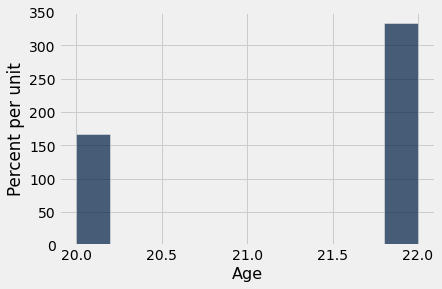

In [42]:
a.hist("Age")

# Pandas

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')
sns.set_context("notebook")


In [52]:
pd.DataFrame()

""


In [54]:
pd.DataFrame(data={"Name": ["Richard", "Laryn", "Cooper"], "Age": [22, 20, 22]})

,Name,Age
0,Richard,22
1,Laryn,20
2,Cooper,22


In [55]:
a

Name,Age
Richard,22
Laryn,20
Cooper,22


In [67]:
b = pd.DataFrame(data={"Name": ["Richard", "Laryn", "Cooper"], "Age": [22, 20, 22]})

In [68]:
b["Name"]

0    Richard
1      Laryn
2     Cooper
Name: Name, dtype: object

In [69]:
type(b["Name"])

pandas.core.series.Series

In [70]:
b["Name"][0]

'Richard'

In [75]:
b["Age"].mean()

21.333333333333332

In [77]:
b["Age"] == 22

0     True
1    False
2     True
Name: Age, dtype: bool

In [78]:
b[b["Age"] == 22]

,Name,Age
0,Richard,22
2,Cooper,22


In [80]:
## Thank you Data 100 for this example
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.sample(5)

,State,Sex,Year,Name,Count
92355,CA,F,1983,Corine,16
372817,CA,M,2012,Raylan,24
102123,CA,F,1986,Mylene,6
115197,CA,F,1990,Austyn,7
60463,CA,F,1969,Shalonda,7


In [86]:
groups = babynames.groupby(by = "Year").sum()

In [100]:
groups.reset_index(inplace=True)
groups

,Year,Count
0,1910,9163
1,1911,9983
2,1912,17946
3,1913,22094
4,1914,26926
...,...,...
107,2017,410835
108,2018,395151
109,2019,386504
110,2020,362180


<AxesSubplot:xlabel='Year'>

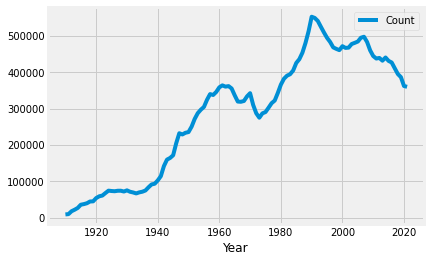

In [102]:
groups.plot(x="Year",y="Count")

array([[<AxesSubplot:title={'center':'Count'}>]], dtype=object)

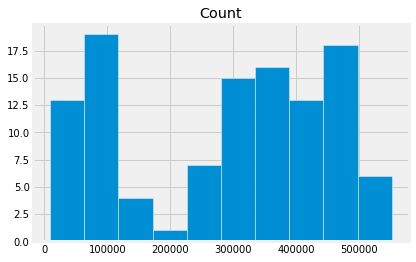

In [89]:
groups.hist()

<AxesSubplot:xlabel='Year', ylabel='Count'>

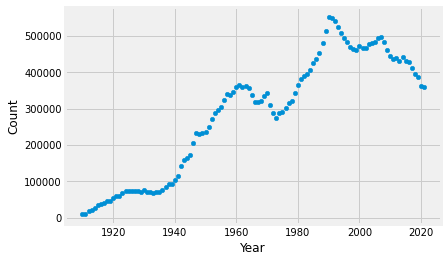

In [103]:
groups.plot.scatter(x = "Year", y = "Count")

In [ ]:
babynames["Year"

In [106]:
babynames[babynames["Year"] == 2021]

,State,Sex,Year,Name,Count
232145,CA,F,2021,Olivia,2395
232146,CA,F,2021,Emma,2171
232147,CA,F,2021,Camila,2065
232148,CA,F,2021,Mia,2021
232149,CA,F,2021,Sophia,1808
...,...,...,...,...,...
400757,CA,M,2021,Zyan,5
400758,CA,M,2021,Zyion,5
400759,CA,M,2021,Zyire,5
400760,CA,M,2021,Zylo,5


In [108]:
babynames[babynames["Year"] == 2021].sort_values(by = "Count", ascending = False).head(5)

,State,Sex,Year,Name,Count
397909,CA,M,2021,Noah,2591
397910,CA,M,2021,Liam,2469
232145,CA,F,2021,Olivia,2395
232146,CA,F,2021,Emma,2171
397911,CA,M,2021,Mateo,2108


In [109]:
babynames["Count"]

0         295
1         239
2         220
3         163
4         134
         ... 
400757      5
400758      5
400759      5
400760      5
400761      5
Name: Count, Length: 400762, dtype: int64

In [110]:
babynames[["Count"]]

,Count
0,295
1,239
2,220
3,163
4,134
...,...
400757,5
400758,5
400759,5
400760,5


In [114]:
babynames[babynames["Year"] == 2021]["Count"].sum()

359997

In [524]:
starts_with_j = []
babynames[[x[0] == 'O' for x in babynames["Name"]]]

,State,Sex,Year,Name,Count
111,CA,F,1910,Olive,13
166,CA,F,1910,Olga,8
316,CA,F,1911,Olga,21
379,CA,F,1911,Olive,11
393,CA,F,1911,Opal,9
...,...,...,...,...,...
400653,CA,M,2021,Olliver,5
400654,CA,M,2021,Olly,5
400655,CA,M,2021,Orhan,5
400656,CA,M,2021,Oswald,5


In [530]:
babynames[(babynames["Name"] == "Richard") & (babynames["Year"] == 1999)]

,State,Sex,Year,Name,Count
336288,CA,M,1999,Richard,1002


# Machine Learning

In [117]:
# Thanks again to Data 100 for this example
diamonds = pd.read_csv("diamonds.csv.zip", index_col=0)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [205]:
features = diamonds[['carat', 'depth', 'table', 'price']]

In [206]:
x = features[['carat', 'depth', 'table']]
y = features["price"]

In [207]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x,y)

In [208]:
f = features.sample(100)
xs = f[['carat', 'depth', 'table']]
ys = f["price"]

In [209]:
len(model.predict(xs)), len(ys)

(100, 100)

In [210]:
res = pd.DataFrame(data = {"Num": list(range(100)), "Predicted": model.predict(xs), "Real":ys})


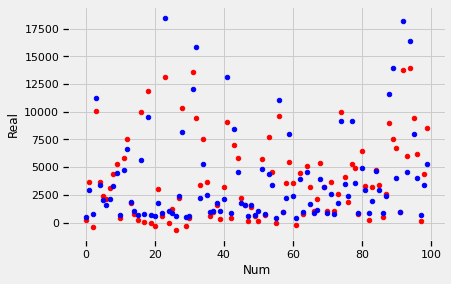

In [211]:
ax1 = res.plot(kind='scatter',x = 'Num', y='Predicted', color='r') 
ax2 = res.plot(kind='scatter',x = 'Num', y='Real', color='b', ax=ax1) 


In [349]:
from sklearn.datasets import load_iris

In [350]:
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data)

In [351]:
iris_data.rename(columns={0:"sepal_length", 1:"sepal_width",2:"petal_length",3:"petal_width"}, inplace=True)

In [352]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [353]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [354]:
mapping = {0:"setosa", 1:"versicolor",2:"virginica"}
new_target = [mapping[x] for x in iris.target]
iris_data["species"] = new_target
iris_data["spec"] = iris.target

In [355]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species,spec
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

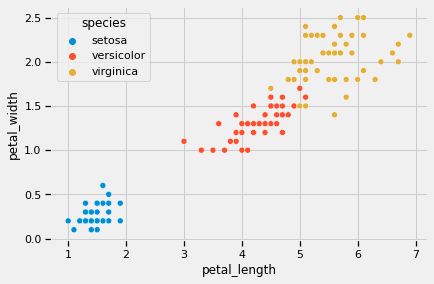

In [356]:
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species", legend=True)

In [357]:
from sklearn import tree
petal_dt_model = tree.DecisionTreeClassifier()
petal_dt_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

DecisionTreeClassifier()

/Users/roggenkemper/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


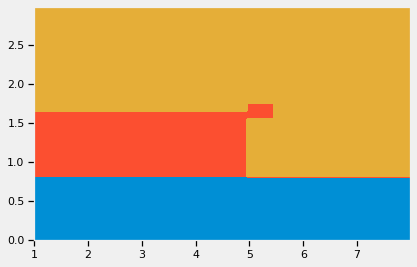

In [358]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(1, 8, 0.02),
                     np.arange(0, 3, 0.02))

Z_string = petal_dt_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)

/Users/roggenkemper/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

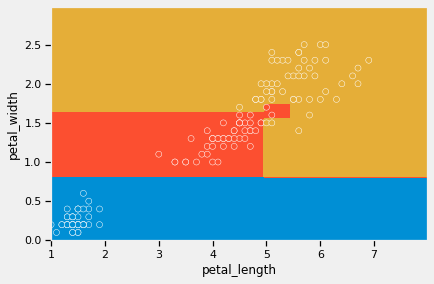

In [359]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(1, 8, 0.02),
                     np.arange(0, 3, 0.02))

Z_string = petal_dt_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)

cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species", legend=False)

In [360]:
moo = pd.read_csv(guesses.csv)

NameError: name 'guesses' is not defined

In [505]:
from sklearn import tree, ensemble
from sklearn.model_selection import train_test_split

train_iris_data, test_iris_data = train_test_split(iris_data, test_size=0.25, random_state=18)

sepal_dt_model = tree.DecisionTreeClassifier()
sepal_dt_model.fit(train_iris_data[["sepal_length", "sepal_width"]], train_iris_data["species"])

DecisionTreeClassifier()

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

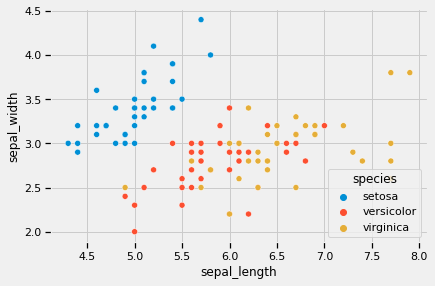

In [506]:
train_iris_data.sort_values("species",inplace=True)
sns.scatterplot(data = train_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=True)

/Users/roggenkemper/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

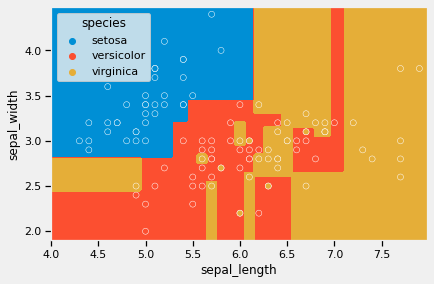

In [507]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_dt_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)

sns.scatterplot(data = train_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=True)

In [508]:
sepal_rf_model = ensemble.RandomForestClassifier(max_depth = 3)
sepal_rf_model.fit(train_iris_data[["sepal_length", "sepal_width"]], train_iris_data["species"])

RandomForestClassifier(max_depth=3)

/Users/roggenkemper/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

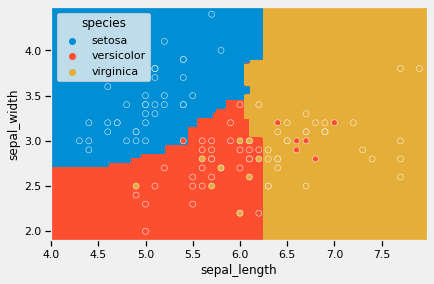

In [509]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)

sns.scatterplot(data = train_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=True)


In [510]:
x_train, y_train =train_iris_data[["sepal_length", "sepal_width"]], train_iris_data["species"]
sepal_rf_model.score(x_train,y_train), sepal_dt_model.score(x_train,y_train)

(0.8303571428571429, 0.9464285714285714)

In [511]:
x_test , y_test = test_iris_data[["sepal_length", "sepal_width"]], test_iris_data["species"]

sepal_rf_model.score(x_test,y_test), sepal_dt_model.score(x_test,y_test)

(0.76315789473684215, 0.71052631578947367)

In [512]:
x_train, y_train = train_iris_data[["sepal_length", "sepal_width","petal_length", "petal_width"]], train_iris_data["species"]
sepal_rf_model.fit(x_train, y_train)
sepal_dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [513]:
sepal_rf_model.score(x_train, y_train), sepal_dt_model.score(x_train, y_train)

(0.9642857142857143, 1.0)

In [514]:
x_test , y_test = test_iris_data[["sepal_length", "sepal_width","petal_length", "petal_width"]], test_iris_data["species"]

sepal_rf_model.score(x_test,y_test), sepal_dt_model.score(x_test,y_test)

(1.0, 0.97368421052631582)